# Пребарување А*

## Референци

1. [Пребарување А*](https://en.wikipedia.org/wiki/A*_search_algorithm)

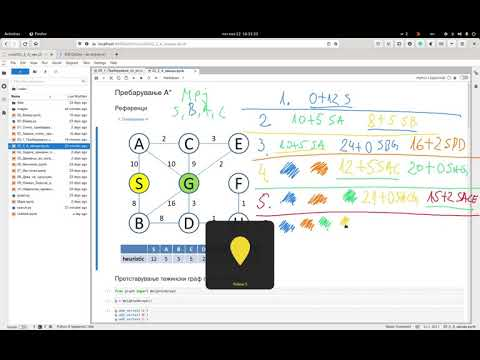

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('3cbtXtb_ypo')

![](images/A_star.png)

## Претставување тежински граф преку речник

In [2]:
from graph import WeightedGraph

In [3]:
g = WeightedGraph()

In [4]:
g.add_vertex('A')
g.add_vertex('B')
g.add_vertex('C')
g.add_vertex('D')
g.add_vertex('E')
g.add_vertex('F')
g.add_vertex('G')
g.add_vertex('H')
g.add_vertex('S')

In [5]:
g.vertices()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'S']

In [6]:
g.add_edge(('A', 'C', 2))
g.add_edge(('A', 'S', 10))
g.add_edge(('B', 'D', 8))
g.add_edge(('B', 'G', 16))
g.add_edge(('B', 'S', 8))
g.add_edge(('C', 'E', 3))
g.add_edge(('C', 'G', 9))
g.add_edge(('D', 'H', 1))
g.add_edge(('D', 'G', 3))
g.add_edge(('E', 'G', 2))
g.add_edge(('F', 'H', 1))

In [7]:
g.edges()

[('A', 'C', 2),
 ('A', 'S', 10),
 ('B', 'D', 8),
 ('B', 'G', 16),
 ('B', 'S', 8),
 ('C', 'A', 2),
 ('C', 'E', 3),
 ('C', 'G', 9),
 ('D', 'B', 8),
 ('D', 'H', 1),
 ('D', 'G', 3),
 ('E', 'C', 3),
 ('E', 'G', 2),
 ('F', 'H', 1),
 ('G', 'B', 16),
 ('G', 'C', 9),
 ('G', 'D', 3),
 ('G', 'E', 2),
 ('H', 'D', 1),
 ('H', 'F', 1),
 ('S', 'A', 10),
 ('S', 'B', 8)]

In [8]:
g.neighbours('S')

[('A', 10), ('B', 8)]

## Пребарување А*

In [9]:
import heapq

In [10]:
def a_star_search(graph, starting_vertex, goal_vertex, heuristic_function, alpha=1, verbose=False):
    """
    Returns the path from starting_vertex to goal_vertex using the A-star search algorithm.
    """
    # Ако почетниот јазол е еднаков на целниот, тогаш нема логика да пребаруваме воопшто
    if starting_vertex == goal_vertex:
        if verbose:
            print('Почетниот и бараниот јазол се исти')
        return
    # Користиме множество на разгранети јазли. 
    # За разгранет јазол го сметаме оној јазол на кој ќе му ги истражиме и испроцесираме соседите.
    expanded = set()
    # Користиме листа која ни е подредена редица од која ќе го земаме следниот јазол за разгранување.
    # Тука ја памтиме и моменталната патека за секој јазол од почетниот. Дополнително, ја памтиме и цената на патот до тој момент.
    # Редицата ја преуредуваме на специјален начин така што ќе ја направиме хип структура (анг. heap).
    # Понатаму, со редицата ќе работиме само преку heapq библиотеката.
    queue = [((0, 0), [starting_vertex])]
    heapq.heapify(queue)
    # Пребаруваме сѐ додека има јазли за разгранување во редицата.
    while queue:
        if verbose:
            print('Ред за разгранување:')
            for element in queue:
                print(element, end=' ')
            print()
            print()
        # Членови на редицата јазли се патеките од почетниот јазол до некој јазол кој треба да се разграни.
        # За да го земеме наредниот јазол за разгранување, ние треба од редицата да ја извадиме патеката на тој јазол.
        weight_tuple, vertex_list = heapq.heappop(queue)
        # Во оваа имплементација на А-ѕвезда користиме торка од две тежини каде редицата ја подредуваме по збирот 
        # на тежината на поминатиот пат и дојавата. Подредуваме по тежината current_a_star_weight која не ни треба понатаму.
        # Понатаму ја користиме само тежината current_path_weight.
        current_a_star_weight, current_path_weight = weight_tuple
        # Јазолот за разгранување е последниот во оваа листа.
        vertex_to_expand = vertex_list[-1]
        # Тука ја вршиме проверката дали сме стигнале до целниот јазол.
        if vertex_to_expand == goal_vertex:
            if verbose:
                print('Го пронајдовме посакуваниот јазол {}. Патеката да стигнеме до тука е {} со цена {}'
                      .format(vertex_to_expand, vertex_list, current_path_weight))
            return current_path_weight, vertex_list
        # Ако веќе сме го разграниле овој јазол, нема логика да го разгрануваме пак.
        if vertex_to_expand in expanded:
            if verbose:
                print('{} е веќе разгранет'.format(vertex_to_expand, current_path_weight, vertex_list))
            continue
        if verbose:
            print('Го разгрануваме јазолот {} од ({}, {})'.format(vertex_to_expand, current_path_weight, vertex_list))
        # На оваа линија код, сигурни сме дека не сме го разграниле моменталниот јазол. Го разгрануваме така што пребаруваме низ сите негови соседи.
        for neighbour, new_weight in graph.neighbours(vertex_to_expand):
            if neighbour in expanded:
                if verbose:
                    print('{} е веќе разгранет'.format(neighbour))
            else:
                # Ако моменталниот сосед не е разгранет, го додаваме во редицата на јазли за разгранување.
                if verbose:
                    print('{} со тежина {}, кој е соседен јазол на {}, го додаваме во редот за разгранување со нова '
                          'цена и го означуваме како разгранет'.format(neighbour, new_weight, vertex_to_expand))
                # Дојавата која ја користиме е функција добиена како аргумент бидејќи функцијата на дојава е различна за секој проблем.
                heuristic = heuristic_function(neighbour, goal_vertex)
                # Новата вредност на поминатата патека е досегашната патека + новата тежина
                path_weight = current_path_weight + new_weight
                # А тежината во А-ѕвезда е досегашната патека + новата тежина + тежината од дојавата.
                a_star_weight = path_weight + alpha * heuristic
                # Бидејќи ова е пребарување А-ѕвезда, соседот кој го додаваме ќе биде соодветно додаден преку библиотеката heapq.
                heapq.heappush(queue, ((a_star_weight, path_weight), vertex_list + [neighbour]))
        # Откако го разгранивме јазолот, го додаваме во множеството разгранети јазли.
        expanded.add(vertex_to_expand)
        if verbose:
            print()

In [11]:
d_heuristic = {'S': 12, 'A': 5, 'B': 5, 'C': 5, 'D': 2, 'E': 2, 'F': 1, 'G': 1, 'H': 0}
def heuristic(vertex, goal_vertex):
    return d_heuristic[vertex]

In [12]:
a_star_search(g, starting_vertex='S', goal_vertex='G', heuristic_function=heuristic, verbose=True)

Ред за разгранување:
((0, 0), ['S']) 

Го разгрануваме јазолот S од (0, ['S'])
A со тежина 10, кој е соседен јазол на S, го додаваме во редот за разгранување со нова цена и го означуваме како разгранет
B со тежина 8, кој е соседен јазол на S, го додаваме во редот за разгранување со нова цена и го означуваме како разгранет

Ред за разгранување:
((13, 8), ['S', 'B']) ((15, 10), ['S', 'A']) 

Го разгрануваме јазолот B од (8, ['S', 'B'])
D со тежина 8, кој е соседен јазол на B, го додаваме во редот за разгранување со нова цена и го означуваме како разгранет
G со тежина 16, кој е соседен јазол на B, го додаваме во редот за разгранување со нова цена и го означуваме како разгранет
S е веќе разгранет

Ред за разгранување:
((15, 10), ['S', 'A']) ((18, 16), ['S', 'B', 'D']) ((25, 24), ['S', 'B', 'G']) 

Го разгрануваме јазолот A од (10, ['S', 'A'])
C со тежина 2, кој е соседен јазол на A, го додаваме во редот за разгранување со нова цена и го означуваме како разгранет
S е веќе разгранет

Ред за 

(17, ['S', 'A', 'C', 'E', 'G'])